In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def J(w):
    return 1+w**2

def gradJ(w):
    return 2*w

def Jx(w):
    return sum((x-w)**2)/N

def gradJx(w):
    return 2*(w-wx_opt)

In [35]:
def GD(gradJ, w0, Niter):
    w = w0
    w_vals = np.zeros(Niter+1)
    w_vals[0] = w
    lbda = .5/N
    for t in range(Niter):
        w -= lbda * gradJ(w)
        w_vals[t+1] = w
    return w_vals

GD_J = lambda w0, Niter : GD(gradJ, w0, Niter)
GD_Jx = lambda w0, Niter : GD(gradJx, w0, Niter)

def SGD(w0, Niter, randgen):
    w = w0
    w_vals = np.zeros(Niter+1)
    w_vals[0] = w
    for t in range(Niter):
        if t<N:
            xt = x[t]
        else:
            xt = randgen()
        lbdat = 1/(2+t)
        w -= lbdat * 2*(w-xt)
        w_vals[t+1] = w
    return w_vals

SGD_J = lambda w0, Niter : SGD(w0, Niter, lambda : np.random.randn(1).item())
SGD_Jx = lambda w0, Niter : SGD(w0, Niter, lambda : x[np.random.randint(N)])

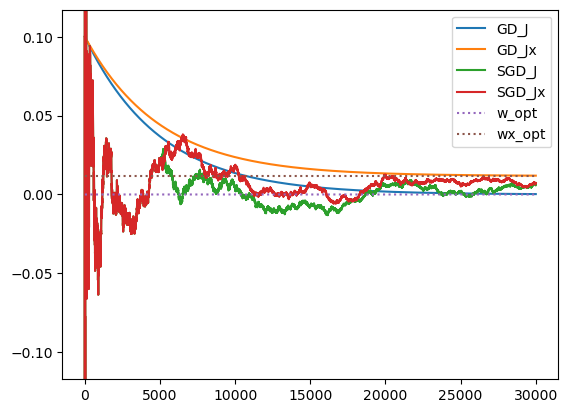

In [47]:
N = 5000
x = np.random.randn(N)
w_opt = 0
wx_opt = sum(x)/N
w0 = .1
Niter = 30000
plt.plot(GD_J(w0, Niter))
plt.plot(GD_Jx(w0, Niter))
plt.plot(SGD_J(w0, Niter))
plt.plot(SGD_Jx(w0, Niter))
plt.plot(np.ones(Niter+1)*w_opt,":")
plt.plot(np.ones(Niter+1)*wx_opt,":")
plt.legend(["GD_J","GD_Jx","SGD_J","SGD_Jx","w_opt","wx_opt"])
plt.ylim([-10*abs(wx_opt),10*abs(wx_opt)])
plt.show()